'''
Resources:

https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

https://towardsdatascience.com/k-means-clustering-and-the-gap-statistics-4c5d414acd29


Extracted the data from Kaggle, Data containes purchase and demographic information.
Performerd EDA, (Removed non informative columns, Chose Label Encoding vs One hot encoding)
Normalized the data. We can give weightage to the columns we want.
Computed Gap Statistics to get the best k.
Verified the scores with Silhoulette, elbow and Davies-Bouldin index methods.
Trained KMeans with k=6
Inspected the correlation matrix to understand the reasoning behind the clustering
Inspected the more correlated columns to add meaning to the clusters by giving relavant names.  


'''


In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# For finding the best K no of clusters

!pip install gap-stat
from gap_statistic import OptimalK


In [7]:
df_raw = pd.read_csv('/content/shopping_trends.csv')
df_raw.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
# Non informative
df_raw = df_raw.drop(columns=['Customer ID', 'Preferred Payment Method'])

In [9]:
df_raw.shape

(3900, 17)

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Payment Method          3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [11]:
df_raw.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [12]:
df_raw_corr = df_raw.corr()

<ipython-input-12-90b52a606be9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw_corr = df_raw.corr()


In [13]:
df_raw_corr

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


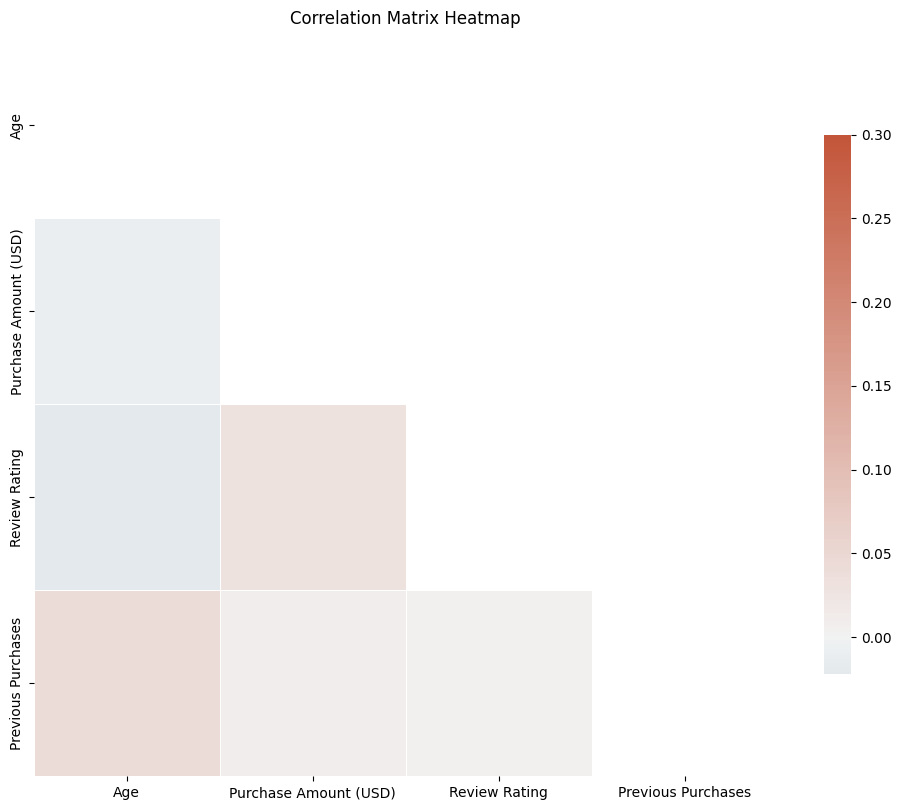

In [14]:


numeric_cols = df_raw.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a custom color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})

plt.title('Correlation Matrix Heatmap')
plt.show()


In [15]:
df_cat = df_raw.select_dtypes(include='object')
print(df_cat.shape)
df_cat.head()

(3900, 13)


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Frequency of Purchases
0,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Credit Card,Express,Yes,Yes,Fortnightly
1,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Bank Transfer,Express,Yes,Yes,Fortnightly
2,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Cash,Free Shipping,Yes,Yes,Weekly
3,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,PayPal,Next Day Air,Yes,Yes,Weekly
4,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Cash,Free Shipping,Yes,Yes,Annually


In [16]:
df_num = df_raw.select_dtypes(exclude='object')
print(df_num.shape)
df_num.head()

(3900, 4)


,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31


In [17]:
df_cat['Frequency of Purchases'].value_counts()


Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

In [18]:
df_cat.columns

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Frequency of Purchases'],
      dtype='object')

In [19]:
df_t = df_raw

In [20]:
label_encoder = LabelEncoder()
df_t['Size'] = label_encoder.fit_transform(df_t['Size'])
df_t['Frequency of Purchases'] = label_encoder.fit_transform(df_t['Frequency of Purchases'])
df_t['Payment Method'] = label_encoder.fit_transform(df_t['Payment Method'])
df_t['Subscription Status'] = label_encoder.fit_transform(df_t['Subscription Status'])
df_t.head()



,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,0,Gray,Winter,3.1,1,2,Express,Yes,Yes,14,3
1,19,Male,Sweater,Clothing,64,Maine,0,Maroon,Winter,3.1,1,0,Express,Yes,Yes,2,3
2,50,Male,Jeans,Clothing,73,Massachusetts,2,Maroon,Spring,3.1,1,1,Free Shipping,Yes,Yes,23,6
3,21,Male,Sandals,Footwear,90,Rhode Island,1,Maroon,Spring,3.5,1,4,Next Day Air,Yes,Yes,49,6
4,45,Male,Blouse,Clothing,49,Oregon,1,Turquoise,Spring,2.7,1,1,Free Shipping,Yes,Yes,31,0


In [21]:
'''
df_t = df_t.drop(columns=['Gender', 'Item Purchased', 'Category', 'Location', 'Color',
       'Season', 'Shipping Type',
       'Discount Applied', 'Promo Code Used'])


'''
df_t = pd.get_dummies(df_t, columns=['Gender', 'Item Purchased', 'Category', 'Location', 'Color',
       'Season', 'Shipping Type',
       'Discount Applied', 'Promo Code Used'])
print(df_t.shape)
df_t.head() #'''

(3900, 128)


,Age,Purchase Amount (USD),Size,Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases,Gender_Female,Gender_Male,...,Shipping Type_2-Day Shipping,Shipping Type_Express,Shipping Type_Free Shipping,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Discount Applied_No,Discount Applied_Yes,Promo Code Used_No,Promo Code Used_Yes
0,55,53,0,3.1,1,2,14,3,0,1,...,0,1,0,0,0,0,0,1,0,1
1,19,64,0,3.1,1,0,2,3,0,1,...,0,1,0,0,0,0,0,1,0,1
2,50,73,2,3.1,1,1,23,6,0,1,...,0,0,1,0,0,0,0,1,0,1
3,21,90,1,3.5,1,4,49,6,0,1,...,0,0,0,1,0,0,0,1,0,1
4,45,49,1,2.7,1,1,31,0,0,1,...,0,0,1,0,0,0,0,1,0,1


In [22]:
#Normalized the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_t)

In [23]:
df = pd.DataFrame(df_scaled)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.718913,-0.285629,-1.203814,-0.907584,1.644294,-0.295206,-0.785831,0.012575,-0.685994,0.685994,...,-0.437684,2.244360,-0.457496,-0.446388,-0.448864,-0.447214,-1.151339,1.151339,-1.151339,1.151339
1,-1.648629,0.178852,-1.203814,-0.907584,1.644294,-1.472409,-1.616552,0.012575,-0.685994,0.685994,...,-0.437684,2.244360,-0.457496,-0.446388,-0.448864,-0.447214,-1.151339,1.151339,-1.151339,1.151339
2,0.390088,0.558882,0.945854,-0.907584,1.644294,-0.883807,-0.162789,1.513849,-0.685994,0.685994,...,-0.437684,-0.445561,2.185813,-0.446388,-0.448864,-0.447214,-1.151339,1.151339,-1.151339,1.151339
3,-1.517099,1.276716,-0.128980,-0.349027,1.644294,0.881996,1.637107,1.513849,-0.685994,0.685994,...,-0.437684,-0.445561,-0.457496,2.240205,-0.448864,-0.447214,-1.151339,1.151339,-1.151339,1.151339
4,0.061263,-0.454531,-0.128980,-1.466141,1.644294,-0.883807,0.391025,-1.488699,-0.685994,0.685994,...,-0.437684,-0.445561,2.185813,-0.446388,-0.448864,-0.447214,-1.151339,1.151339,-1.151339,1.151339


In [24]:
optimal_k = OptimalK(parallel_backend='joblib')
n_clusters = optimal_k(df, cluster_array=np.arange(2,8))
n_clusters

7

# **Gap Statistics:**

Purpose: Gap Statistics compare the performance of a clustering algorithm (e.g., K-means) on the given dataset with the performance on a reference dataset where the data has no inherent clustering.
Calculation: It involves comparing the within-cluster dispersion of the actual data with that of randomly generated data. The optimal number of clusters is where the gap between the actual data and random data is maximized.
Interpretation: A larger gap indicates a more distinct clustering structure.


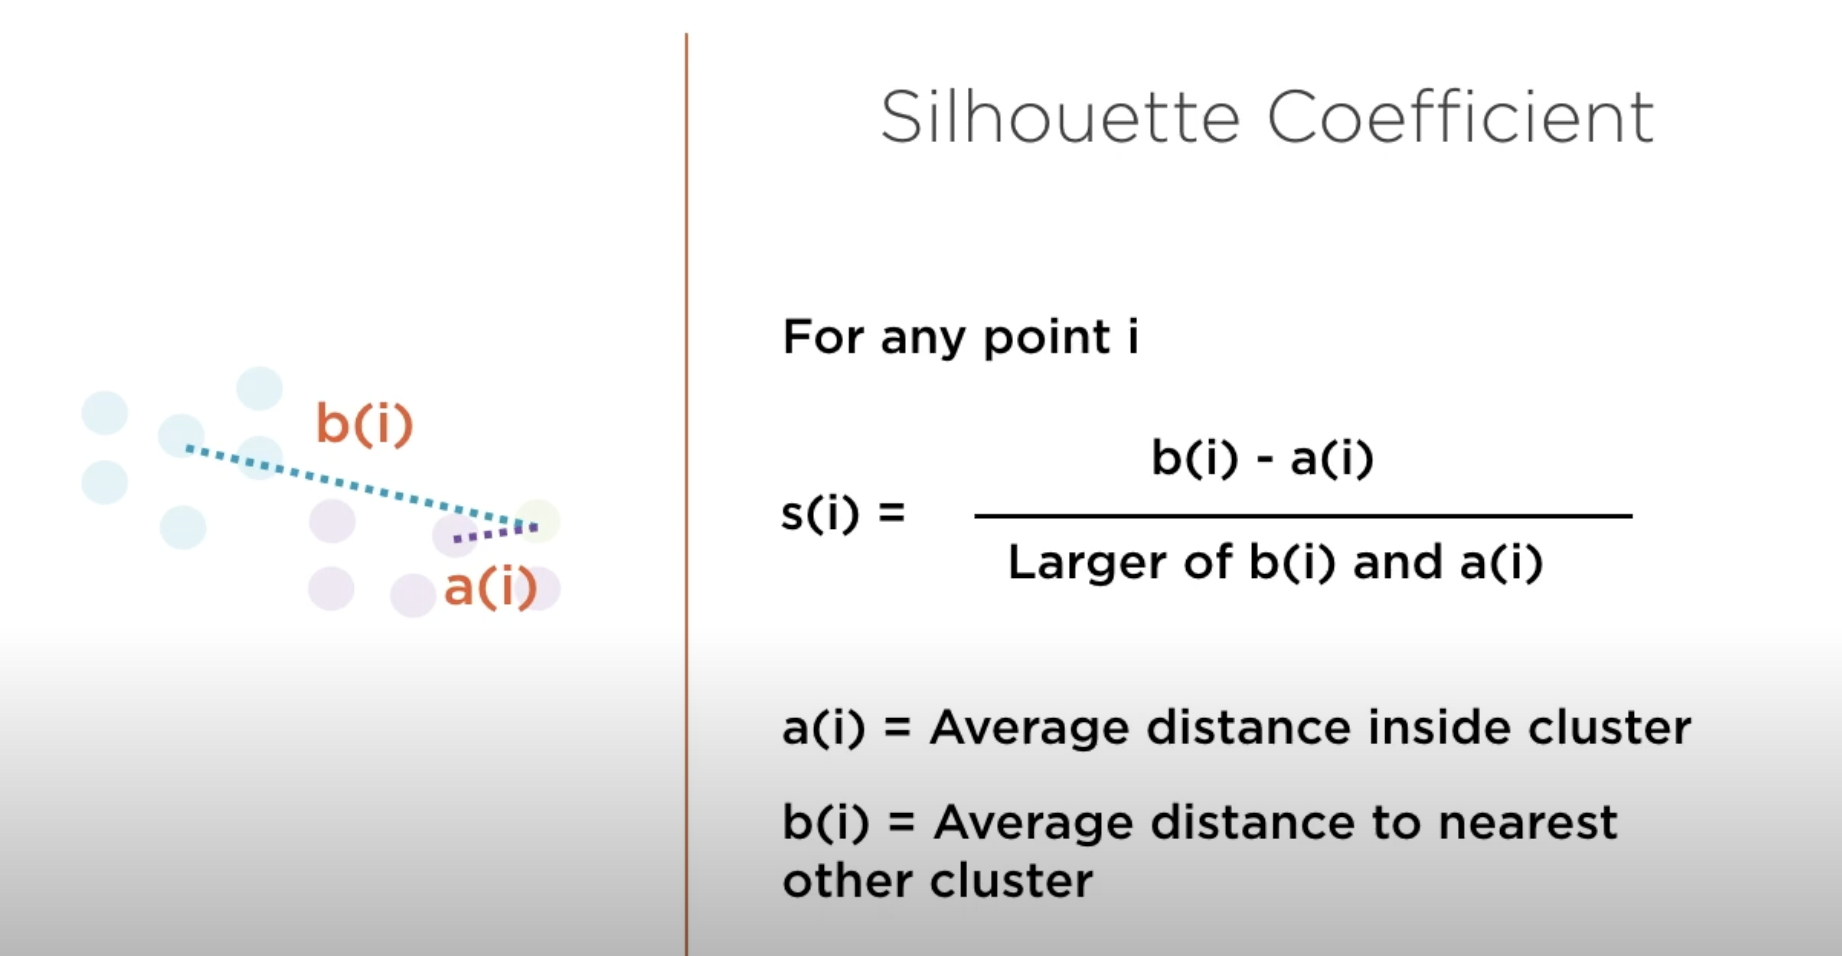

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

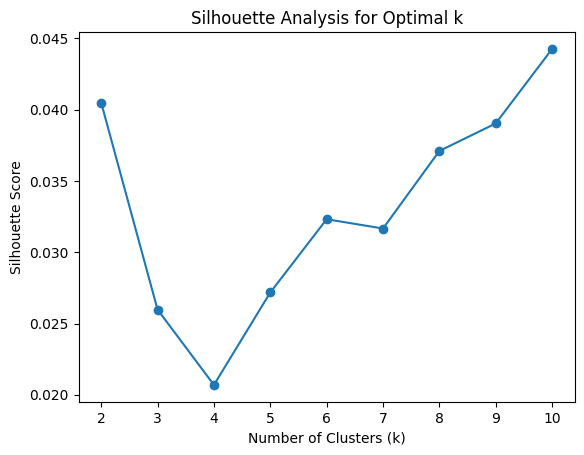

In [25]:
# Silhoulette (The higher the better)

k_values = range(2, 11)

# List to store silhouette scores
silhouette_scores = []

# Perform k-means clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

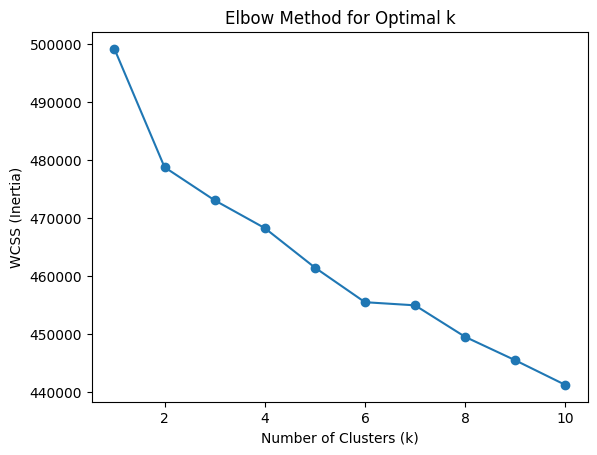

In [26]:
# Elbow (Check the bending point)


# Choose a range of clusters (k values)
k_values = range(1, 11)

# List to store within-cluster sum of squares (WCSS)
wcss = []

# Perform k-means clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)

    # Inertia is the WCSS
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

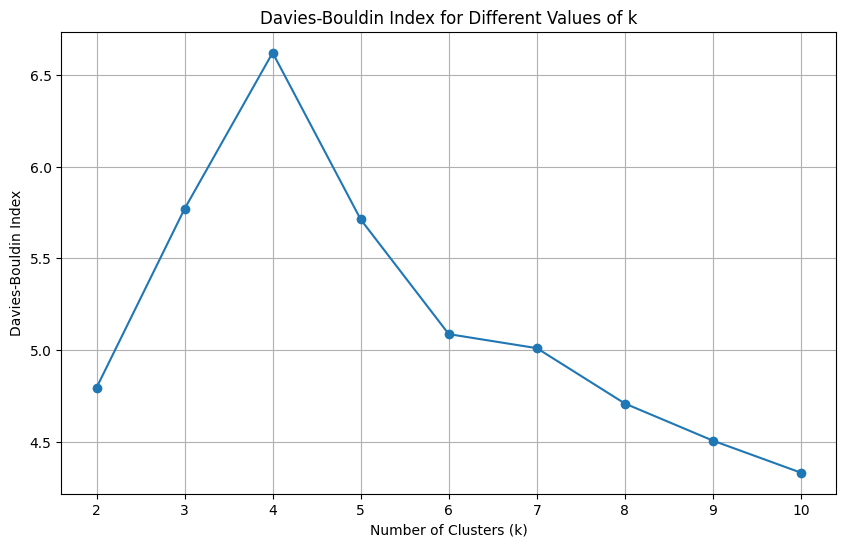

In [27]:
# avies-Bouldin index  (The Lower the better)


from sklearn.metrics import davies_bouldin_score


k_values = range(2, 11)

# Initialize lists to store Davies-Bouldin index values
db_scores = []

# Iterate through different k values
for k in k_values:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)

    # Predict cluster labels
    labels = kmeans.labels_

    # Calculate Davies-Bouldin index
    db_score = davies_bouldin_score(df, labels)
    db_scores.append(db_score)

# Plot Davies-Bouldin index values for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# **KMeans**

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

1. n_clusters (int, default=8):

Purpose: Number of clusters to form.
Usage: Specifies the number of clusters the algorithm should divide the data into.

2. init ({'k-means++', 'random'} or ndarray of shape (n_clusters, n_features), default='k-means++'):

Purpose: Method for initializing the centroids.
Usage:
'k-means++': Selects initial cluster centers for k-means clustering in a smart way to speed up convergence.
'random': Chooses k observations (rows) at random from data for the initial centroids.

3. n_init (int, default=10):

Purpose: Number of times the k-means algorithm will be run with different centroid seeds.
Usage: The final results will be the best output in terms of inertia.

4. max_iter (int, default=300):

Purpose: Maximum number of iterations of the k-means algorithm for a single run.
Usage: Limits the number of iterations in case convergence is not achieved within this number.

5. tol (float, default=1e-4):

Purpose: Tolerance to declare convergence.
Usage: If the change in the within-cluster sum of squares (inertia) is less than tol, the algorithm is considered to have converged.

6. verbose (int, default=0):

Purpose: Verbosity mode.
Usage: If greater than 0, it prints the progress of the k-means algorithm.

7. random_state (int, RandomState instance, or None, default=None):

Purpose: Determines random number generation for centroid initialization and random reassignment.
Usage: If an int, it is the seed used by the random number generator; if RandomState instance, it is the random number generator; if None, the random number generator is the RandomState instance used by np.random.

In [28]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None)
labels = kmeans.fit_predict(df)

In [29]:
df_t['class'] = labels
df_t.head()

,Age,Purchase Amount (USD),Size,Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases,Gender_Female,Gender_Male,...,Shipping Type_Express,Shipping Type_Free Shipping,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Discount Applied_No,Discount Applied_Yes,Promo Code Used_No,Promo Code Used_Yes,class
0,55,53,0,3.1,1,2,14,3,0,1,...,1,0,0,0,0,0,1,0,1,1
1,19,64,0,3.1,1,0,2,3,0,1,...,1,0,0,0,0,0,1,0,1,1
2,50,73,2,3.1,1,1,23,6,0,1,...,0,1,0,0,0,0,1,0,1,1
3,21,90,1,3.5,1,4,49,6,0,1,...,0,0,1,0,0,0,1,0,1,1
4,45,49,1,2.7,1,1,31,0,0,1,...,0,1,0,0,0,0,1,0,1,1


In [37]:
df_raw['class'] = labels
df_raw.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,class
0,55,Male,Blouse,Clothing,53,Kentucky,0,Gray,Winter,3.1,1,2,Express,Yes,Yes,14,3,1
1,19,Male,Sweater,Clothing,64,Maine,0,Maroon,Winter,3.1,1,0,Express,Yes,Yes,2,3,1
2,50,Male,Jeans,Clothing,73,Massachusetts,2,Maroon,Spring,3.1,1,1,Free Shipping,Yes,Yes,23,6,1
3,21,Male,Sandals,Footwear,90,Rhode Island,1,Maroon,Spring,3.5,1,4,Next Day Air,Yes,Yes,49,6,1
4,45,Male,Blouse,Clothing,49,Oregon,1,Turquoise,Spring,2.7,1,1,Free Shipping,Yes,Yes,31,0,1


In [30]:
print(df_t['class'].value_counts())

0    1037
3     916
1     909
5     543
4     324
2     171
Name: class, dtype: int64


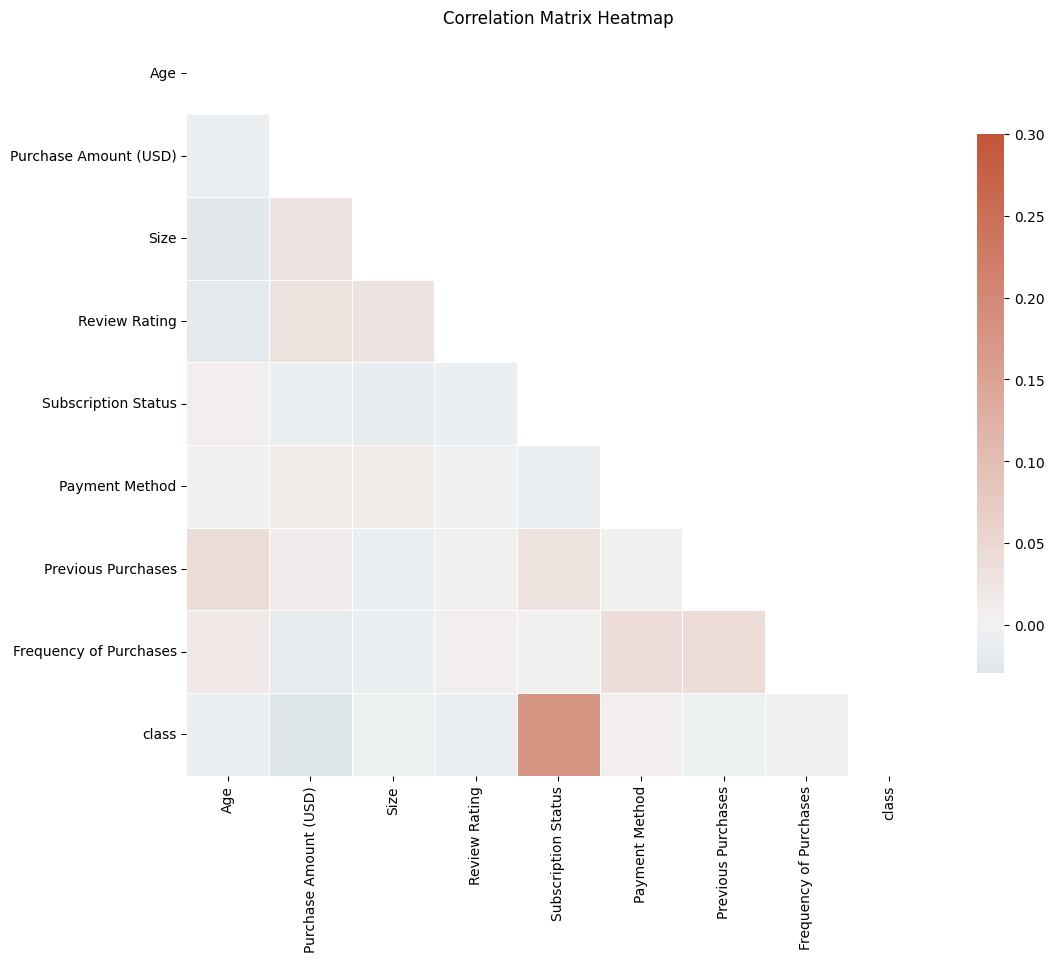

In [40]:
numeric_cols = df_raw.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a custom color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})

plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
# Assuming df is your DataFrame and correlation_matrix is the pre-computed correlation matrix
correlation_with_class = corr_matrix['class'].abs()

# Select the first 20 features based on highest correlation
top_20_correlations = correlation_with_class.sort_values(ascending=False).head(20)
top_20_correlations



class                      1.000000
Category_Footwear          0.391413
Category_Outerwear         0.331963
Promo Code Used_Yes        0.269342
Discount Applied_Yes       0.269342
Promo Code Used_No         0.269342
Discount Applied_No        0.269342
Item Purchased_Jacket      0.230329
Item Purchased_Coat        0.228850
Item Purchased_Sandals     0.197509
Item Purchased_Shoes       0.186685
Subscription Status        0.179452
Item Purchased_Boots       0.176264
Item Purchased_Sneakers    0.173416
Gender_Female              0.167956
Gender_Male                0.167956
Category_Accessories       0.052492
Item Purchased_Hat         0.051263
Category_Clothing          0.050422
Location_Pennsylvania      0.038324
Name: class, dtype: float64

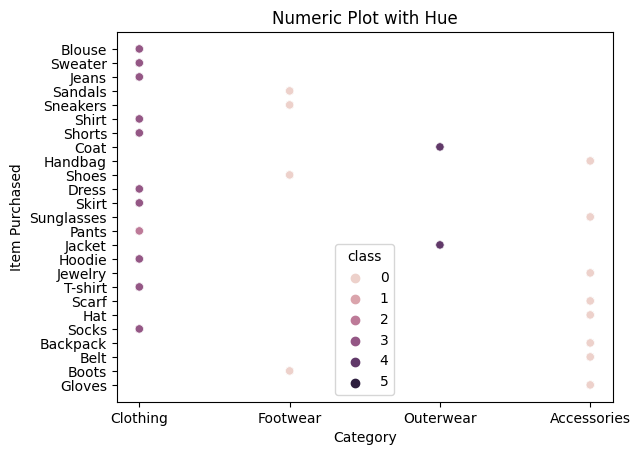

In [39]:


# Assuming df is your DataFrame
sns.scatterplot(x='Category', y='Item Purchased', hue='class', data=df_raw)
plt.title('Numeric Plot with Hue')
plt.show()
